### Portfolio Building 

### Importing necessary packages and price data

In [1]:
# importing necessary libraries 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from itertools import product
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#loading file into dataframe 
path = "Prices.csv"
prices=pd.read_csv(path,parse_dates=True)
prices.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
prices.set_index("Date",inplace=True)
prices.head()


,AAPL,AMZN,ATT,AUD,BOND,EUR,GE,GOLD,INTC,SILVER,SPY
Date,,,,,,,,,,,
1999-12-31,0.917969,3.806250,36.820244,0.6567,798.154631,1.0062,396.794861,288.00,41.15625,5.380,146.8750
2000-01-03,0.999442,4.468750,35.498489,0.6585,793.868670,1.0243,384.615387,289.00,43.50000,5.405,145.4375
2000-01-04,0.915179,4.096875,33.421452,0.6550,796.761677,1.0296,369.230774,282.25,41.46875,5.325,139.7500
2000-01-05,0.928571,3.487500,33.940708,0.6579,793.118215,1.0321,368.589752,280.00,41.81250,5.145,140.0000
2000-01-06,0.848214,3.278125,33.043808,0.6533,795.091984,1.0328,373.517639,281.10,39.37500,5.120,137.7500


In [3]:
#Checking for null values and verifying data types of the dataframe
prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4745 entries, 1999-12-31 to 2018-12-31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4745 non-null   float64
 1   AMZN    4745 non-null   float64
 2   ATT     4745 non-null   float64
 3   AUD     4745 non-null   float64
 4   BOND    4745 non-null   float64
 5   EUR     4745 non-null   float64
 6   GE      4745 non-null   float64
 7   GOLD    4745 non-null   float64
 8   INTC    4745 non-null   float64
 9   SILVER  4745 non-null   float64
 10  SPY     4745 non-null   float64
dtypes: float64(11)
memory usage: 444.8+ KB


In [4]:
# universal plot dimensions we will use as the figsize argument for all plots
aspect_ratio=(8,5)
pct_format_4d = '{:.4%}'
pct_format_2d = '{:.2%}'

In [5]:
#Calculating log returns
logReturns = np.log(prices / prices.shift(1))
logReturns

,AAPL,AMZN,ATT,AUD,BOND,EUR,GE,GOLD,INTC,SILVER,SPY
Date,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.085034,0.160464,-0.036558,0.002737,-0.005384,0.017829,-0.031176,0.003466,0.055385,0.004636,-0.009835
2000-01-04,-0.088077,-0.086884,-0.060292,-0.005329,0.003638,0.005161,-0.040822,-0.023633,-0.047821,-0.014912,-0.039891
2000-01-05,0.014527,-0.161039,0.015417,0.004418,-0.004583,0.002425,-0.001738,-0.008004,0.008255,-0.034387,0.001787
2000-01-06,-0.090514,-0.061914,-0.026781,-0.007017,0.002486,0.000678,0.013281,0.003921,-0.060064,-0.004871,-0.016202
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.026215,-0.024613,-0.034133,0.001278,0.001688,0.002985,-0.032697,0.009722,-0.028273,0.008298,-0.026778
2018-12-26,0.068053,0.090254,0.025975,0.002409,-0.002511,-0.004658,0.065712,-0.001640,0.057936,0.017478,0.049290
2018-12-27,-0.006511,-0.006315,0.002490,-0.004681,0.002101,0.006759,-0.016371,0.006740,0.003674,0.012689,0.007648


In [6]:
logReturns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4745 entries, 1999-12-31 to 2018-12-31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4744 non-null   float64
 1   AMZN    4744 non-null   float64
 2   ATT     4744 non-null   float64
 3   AUD     4744 non-null   float64
 4   BOND    4744 non-null   float64
 5   EUR     4744 non-null   float64
 6   GE      4744 non-null   float64
 7   GOLD    4744 non-null   float64
 8   INTC    4744 non-null   float64
 9   SILVER  4744 non-null   float64
 10  SPY     4744 non-null   float64
dtypes: float64(11)
memory usage: 444.8+ KB


In [7]:
#dropping na from log returns
logReturns.dropna(inplace=True)

In [8]:
#function to calculate summary stats
annualization_factor=260
pct_format_2d = '{:.2%}'
def calc_summary_stats(dF, af=annualization_factor, pct_format=pct_format_2d):
    cumRtns = dF.cumsum()
    summary_stats = pd.DataFrame([af*dF.mean(),
                                  np.sqrt(af)*dF.std(),
                                  np.sqrt(af) * dF.mean() / dF.std(),
                                  (cumRtns - np.maximum.accumulate(cumRtns)).min(axis=0),
                                  (dF >= 0).sum() / dF.shape[0]
                                 ],
                                 index=['Average Annual Return', 'Annual Risk', 'Sharpe Ratio', 'maxDD', 'Success Ratio']
                                )
    print_data_frame_pct(summary_stats, pct_format=pct_format, indexSlice=pd.IndexSlice[['Average Annual Return', 'Annual Risk', 'maxDD', 'Success Ratio'], :])
    #percent_df_display(summary_stats, pct_format)
    return summary_stats

In [9]:
# Creating a function to take in a dataframe and return it out in a percentage format rounded to 2 decimal placed
def print_data_frame_pct (dF, pct_format=pct_format_4d, nan='NaN', indexSlice=pd.IndexSlice[:,:]): # definging function name along with its arguments
    return (dF.style.format(pct_format, na_rep=nan, subset=indexSlice)) # displaying the dataframe in the required format

In [10]:
# calcualting the correlation dataframe of the logReturns dataframe and printing it out in a percentage format rounded to 2 decimal placed 
print_data_frame_pct(logReturns.corr(), pct_format=pct_format_2d) 

,AAPL,AMZN,ATT,AUD,BOND,EUR,GE,GOLD,INTC,SILVER,SPY
AAPL,100.00%,32.93%,24.46%,17.80%,-15.93%,-0.05%,34.06%,-2.98%,46.96%,5.48%,49.33%
AMZN,32.93%,100.00%,18.20%,16.01%,-13.32%,0.03%,29.65%,-3.72%,38.33%,2.53%,46.56%
ATT,24.46%,18.20%,100.00%,23.57%,-12.99%,6.56%,38.30%,-2.19%,32.68%,4.88%,56.38%
AUD,17.80%,16.01%,23.57%,100.00%,-2.58%,54.75%,27.27%,33.39%,21.83%,40.93%,43.83%
BOND,-15.93%,-13.32%,-12.99%,-2.58%,100.00%,13.83%,-20.76%,16.32%,-19.22%,6.21%,-26.45%
EUR,-0.05%,0.03%,6.56%,54.75%,13.83%,100.00%,6.51%,38.63%,-0.37%,35.67%,11.20%
GE,34.06%,29.65%,38.30%,27.27%,-20.76%,6.51%,100.00%,-5.09%,42.49%,5.28%,69.63%
GOLD,-2.98%,-3.72%,-2.19%,33.39%,16.32%,38.63%,-5.09%,100.00%,-3.45%,76.59%,-1.44%
INTC,46.96%,38.33%,32.68%,21.83%,-19.22%,-0.37%,42.49%,-3.45%,100.00%,5.03%,64.15%
SILVER,5.48%,2.53%,4.88%,40.93%,6.21%,35.67%,5.28%,76.59%,5.03%,100.00%,14.84%


In [11]:
import seaborn as sns

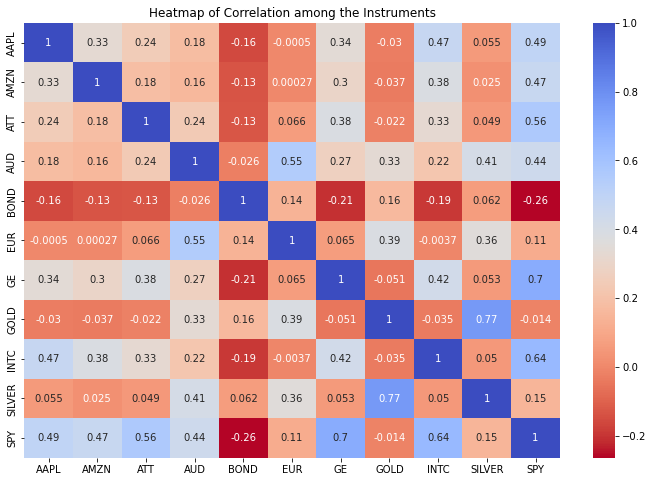

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(data=logReturns.corr(),cmap='coolwarm_r',annot=True)
plt.title('Heatmap of Correlation among the Instruments')
plt.show();

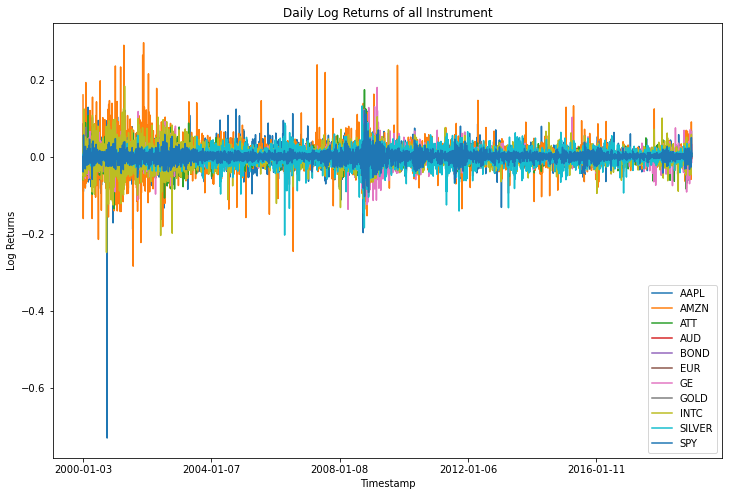

In [13]:
logReturns.plot(figsize=(12,8))
plt.title('Daily Log Returns of all Instrument')
plt.xlabel('Timestamp')
plt.ylabel('Log Returns')
plt.show();

In [14]:
# calculating the summary stats of logReturns table using the calc_summary_stats function created above
summary_stats = calc_summary_stats(logReturns) 
summary_stats

,AAPL,AMZN,ATT,AUD,BOND,EUR,GE,GOLD,INTC,SILVER,SPY
Average Annual Return,0.206084,0.163440,-0.029343,0.003882,0.012411,0.007164,-0.105173,0.081858,0.007195,0.057975,0.029133
Annual Risk,0.433101,0.536613,0.266217,0.131453,0.037481,0.102092,0.314310,0.178154,0.380026,0.304557,0.196204
Sharpe Ratio,0.475834,0.304578,-0.110222,0.029530,0.331122,0.070168,-0.334616,0.459479,0.018933,0.190360,0.148482
maxDD,-1.703828,-2.706094,-1.106851,-0.487846,-0.142077,-0.431375,-2.198225,-0.590679,-1.824269,-1.264769,-0.831804
Success Ratio,0.522344,0.512226,0.516442,0.527192,0.524663,0.509907,0.500843,0.524452,0.516863,0.540894,0.539418


In [15]:
#correlation of stocks
stocks = ['AAPL','AMZN','ATT','GE','INTC','SPY']
print_data_frame_pct(logReturns[stocks].corr(), pct_format=pct_format_2d) 

,AAPL,AMZN,ATT,GE,INTC,SPY
AAPL,100.00%,32.93%,24.46%,34.06%,46.96%,49.33%
AMZN,32.93%,100.00%,18.20%,29.65%,38.33%,46.56%
ATT,24.46%,18.20%,100.00%,38.30%,32.68%,56.38%
GE,34.06%,29.65%,38.30%,100.00%,42.49%,69.63%
INTC,46.96%,38.33%,32.68%,42.49%,100.00%,64.15%
SPY,49.33%,46.56%,56.38%,69.63%,64.15%,100.00%


In [16]:
summary_stats

,AAPL,AMZN,ATT,AUD,BOND,EUR,GE,GOLD,INTC,SILVER,SPY
Average Annual Return,0.206084,0.163440,-0.029343,0.003882,0.012411,0.007164,-0.105173,0.081858,0.007195,0.057975,0.029133
Annual Risk,0.433101,0.536613,0.266217,0.131453,0.037481,0.102092,0.314310,0.178154,0.380026,0.304557,0.196204
Sharpe Ratio,0.475834,0.304578,-0.110222,0.029530,0.331122,0.070168,-0.334616,0.459479,0.018933,0.190360,0.148482
maxDD,-1.703828,-2.706094,-1.106851,-0.487846,-0.142077,-0.431375,-2.198225,-0.590679,-1.824269,-1.264769,-0.831804
Success Ratio,0.522344,0.512226,0.516442,0.527192,0.524663,0.509907,0.500843,0.524452,0.516863,0.540894,0.539418


In [17]:
logReturnsall=logReturns.copy()

### Q2 


### Choosing the instruments

In [18]:
#Portfolio with 8 instruments
df_prices = prices[['AAPL','AMZN','ATT','GE','INTC','GOLD','EUR','BOND']]
df_prices

,AAPL,AMZN,ATT,GE,INTC,GOLD,EUR,BOND
Date,,,,,,,,
1999-12-31,0.917969,3.806250,36.820244,396.794861,41.156250,288.00,1.0062,798.154631
2000-01-03,0.999442,4.468750,35.498489,384.615387,43.500000,289.00,1.0243,793.868670
2000-01-04,0.915179,4.096875,33.421452,369.230774,41.468750,282.25,1.0296,796.761677
2000-01-05,0.928571,3.487500,33.940708,368.589752,41.812500,280.00,1.0321,793.118215
2000-01-06,0.848214,3.278125,33.043808,373.517639,39.375000,281.10,1.0328,795.091984
...,...,...,...,...,...,...,...,...
2018-12-24,36.707500,67.197998,20.664654,53.230770,43.590000,1269.22,1.1406,998.805410
2018-12-26,39.292500,73.544998,21.208460,56.846153,46.189999,1267.14,1.1353,996.301026
2018-12-27,39.037498,73.082001,21.261330,55.923077,46.360001,1275.71,1.1430,998.396182


In [19]:
#logreturns 8 instruments for portfolio  
logReturns = logReturns[['AAPL','AMZN','ATT','GE','INTC','GOLD','EUR','BOND']]

### Running the trading strategies

In [20]:
#function for MA crossover strategy 

def movingAverageCrossover(df, col ,fastWindow, slowWindow, flatOrShort=0):
    df.loc[:,'FastSMA'] = df[col].rolling(fastWindow).mean()
    df.loc[:,'SlowSMA'] = df[col].rolling(slowWindow).mean()
    df.dropna(inplace=True) # drop off all the Nulls created by taking SMAs
    df.loc[:,'Position'] = np.where(df['FastSMA'] > df['SlowSMA'], 1, flatOrShort) # Stay long till Fast SMA is > Slow SMA, else go flat
    df.loc[:,'OriginalReturns'] = np.log(df[col] / df[col].shift(1))  # calculate SPY stock price log returns
    df.loc[:,'SMAReturns'] = df['Position'].shift(1) * df['OriginalReturns']  # calculte the log SMA returns, by pushing down the Position column
    df.dropna(inplace=True) # drop off all the remaining Nulls
    return calc_summary_stats(df[['OriginalReturns', 'SMAReturns']]) # return only the required 2 columns


In [21]:
#AAPL with MA crossover flat strategy 
flatOrShort = 0 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_AAPL = movingAverageCrossover(dfPrice2, 'AAPL',42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_AAPL   #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,0.278819,0.238173
Annual Risk,0.370138,0.283479
Sharpe Ratio,0.753284,0.840178
maxDD,-0.938197,-0.829613
Success Ratio,0.523077,0.650836


In [22]:
#AMZN with MA crossover flat strategy
flatOrShort = 0 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_AMZN = movingAverageCrossover(dfPrice2, 'AMZN', 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_AMZN   #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,0.259787,0.200783
Annual Risk,0.489128,0.332287
Sharpe Ratio,0.531122,0.604247
maxDD,-1.298598,-0.972030
Success Ratio,0.516388,0.659755


In [23]:
#ATT with MA crossover sell strategy
flatOrShort = -1 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_ATT = movingAverageCrossover(dfPrice2, 'ATT', 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_ATT  #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,-0.035196,0.020533
Annual Risk,0.251193,0.251199
Sharpe Ratio,-0.140113,0.081739
maxDD,-0.968424,-0.715106
Success Ratio,0.516611,0.513043


In [24]:
#GE with MA crossover sell strategy
flatOrShort = -1 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_GE = movingAverageCrossover(dfPrice2, 'GE', 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_GE   #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,-0.105310,0.104608
Annual Risk,0.308586,0.308587
Sharpe Ratio,-0.341267,0.338990
maxDD,-2.081691,-1.737193
Success Ratio,0.500780,0.519064


In [25]:
#Intel with MA crossover flat stratergy 
flatOrShort = 0 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_INTC = movingAverageCrossover(dfPrice2, 'INTC', 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_INTC  #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,0.019759,-0.010485
Annual Risk,0.352048,0.206303
Sharpe Ratio,0.056127,-0.050826
maxDD,-1.141089,-1.000263
Success Ratio,0.516834,0.730435


In [26]:
#Gold with MA flat strategy 
flatOrShort = 0 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_GOLD = movingAverageCrossover(dfPrice2, 'GOLD', 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_GOLD   #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,0.091575,0.080456
Annual Risk,0.179729,0.145261
Sharpe Ratio,0.509515,0.553872
maxDD,-0.590679,-0.352246
Success Ratio,0.530435,0.677592


In [27]:
#EUR/USD with MA flat statergy 
flatOrShort = 0 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_EUR = movingAverageCrossover(dfPrice2, 'EUR', 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_EUR  #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,0.010793,0.018530
Annual Risk,0.100189,0.071139
Sharpe Ratio,0.107729,0.260482
maxDD,-0.431375,-0.246239
Success Ratio,0.512152,0.708361


In [28]:
#BOND with MA flat statergy 
flatOrShort = 0 # intializing the flatOrShort value as specified
dfPrice2 = prices.copy() # creating an iterative copy of our intial SPY dataframe to append the Fast and Slow SMAs
df_BOND = movingAverageCrossover(dfPrice2, 'BOND', 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
df_BOND   #df_sharpe[column] = df_AAPL.loc['Sharpe Ratio']['SMAReturns'] # returing only the required columns

,OriginalReturns,SMAReturns
Average Annual Return,0.008398,0.003500
Annual Risk,0.037444,0.029909
Sharpe Ratio,0.224273,0.117031
maxDD,-0.142077,-0.123453
Success Ratio,0.523300,0.709253


In [29]:
# defining instruments for short and flat statergy
prices_cols_short = ['ATT','GE']
prices_cols_flat = ['AAPL', 'AMZN', 'EUR', 'GOLD']

In [30]:
#Creating a function to get SMA Returns for the portfolio 
def getSMA(df, col ,fastWindow, slowWindow, flatOrShort=0):
    df.loc[:,'FastSMA'] = df[col].rolling(fastWindow).mean()
    df.loc[:,'SlowSMA'] = df[col].rolling(slowWindow).mean()
    df.dropna(inplace=True) # drop off all the Nulls created by taking SMAs
    df.loc[:,'Position'] = np.where(df['FastSMA'] > df['SlowSMA'], 1, flatOrShort) # Stay long till Fast SMA is > Slow SMA, else go flat
    df.loc[:,'OriginalReturns'] = np.log(df[col] / df[col].shift(1))  # calculate SPY stock price log returns
    df.loc[:,'SMAReturns'] = df['Position'].shift(1) * df['OriginalReturns']  # calculte the log SMA returns, by pushing down the Position column
    df.dropna(inplace=True) # drop off all the remaining Nulls
    #return calc_summary_stats(df[['OriginalReturns', 'SMAReturns']]) # return only the required 2 columns
    return df['SMAReturns']

In [31]:
#Running SMA flat for  'AAPL' , 'AMZN', 'EUR', 'GOLD' and and short statergies for ATT and GE
# For Bond we take the instrument itself
df_sma = pd.DataFrame()
for column in prices_cols_short:
    if column not in ['BOND','INTC']:
        flatOrShort = -1
        dfPrice2 = prices.copy()
        df_sma[column] = getSMA(dfPrice2, column, 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
for column in prices_cols_flat:
    if column not in ['BOND','INTC']:
        dfPrice2 = prices.copy()
        df_sma[column] = getSMA(dfPrice2, column, 42,260, 0)

In [32]:
#creating bollinger band function by accepting dataframe, lookback window and std band as inputs and returns orginal and BB returns
def Bollinger_Bands(df,col,window,stDevBand):
    dfPrices = df.copy()
    dfPrices = dfPrices[[col]]
    dfPrices.loc[:,'Mean'] = dfPrices[col].rolling(window).mean()
    dfPrices.loc[:,'Stdev'] = dfPrices[col].rolling(window).std()
    dfPrices.loc[:,'Upper'] = dfPrices['Mean'] + stDevBand * dfPrices['Stdev']
    dfPrices.loc[:,'Lower'] = dfPrices['Mean'] - stDevBand * dfPrices['Stdev']
    dfPrices.dropna(inplace=True)
    date0 = dfPrices.index[0]
    if dfPrices.loc[date0,col] >= dfPrices.loc[date0, 'Upper']:
        dfPrices.loc[date0, 'Position'] = -1
    elif dfPrices.loc[date0,col] <= dfPrices.loc[date0,'Lower']:
        dfPrices.loc[date0, 'Position'] = 1
    else:
        dfPrices.loc[date0, 'Position'] = 0

# then loop over the entire data set
    for i in range(1, dfPrices.shape[0]):
        today=dfPrices.index[i]
        yesterday=dfPrices.index[i-1]
        if dfPrices.loc[today,col] >= dfPrices.loc[today,'Upper']: # if close is above upper
            dfPrices.loc[today,'Position'] = -1 # then go short
        elif dfPrices.loc[today,col] <= dfPrices.loc[today,'Lower']: # if close is below lower
            dfPrices.loc[today,'Position'] = 1 # then go long
        elif dfPrices.loc[yesterday,'Position'] == -1 and dfPrices.loc[today,col] <= dfPrices.loc[today,'Mean']: # if prev day is short and we're now below the mean
            dfPrices.loc[today,'Position']=0 # then flatten
        elif dfPrices.loc[yesterday,'Position'] == 1 and dfPrices.loc[today, col] >= dfPrices.loc[today, 'Mean']: # conversely...
            dfPrices.loc[today,'Position']=0 # then also flatten
        else: # otherwise just hold yesterday's position
            dfPrices.loc[today,'Position']=dfPrices.loc[yesterday,'Position']
    dfPrices.loc[:,'OriginalReturns'] = np.log(dfPrices[col] / dfPrices[col].shift(1))
    dfPrices.loc[:,'BBReturns'] = dfPrices['Position'].shift(1) * dfPrices['OriginalReturns']
    dfPrices.dropna(inplace=True)
    dfPrices[['OriginalReturns', 'BBReturns']].sum()
    np.exp(dfPrices[['OriginalReturns', 'BBReturns']].sum())
    dfPrices[['OriginalReturns', 'BBReturns']].mean() * 260
    dfPrices[['OriginalReturns', 'BBReturns']].std() * np.sqrt(260)
    return dfPrices['BBReturns']

In [33]:
#Running Bollinger Band strategy for Intel 
df_intc=pd.DataFrame()
df_intc['INTC']=Bollinger_Bands(df_prices,'INTC',20,2)

In [34]:
#summary stats after applying BB stratergy 
calc_summary_stats(df_intc)

,INTC
Average Annual Return,0.085996
Annual Risk,0.274590
Sharpe Ratio,0.313179
maxDD,-0.578121
Success Ratio,0.745820


In [35]:
#inner join Intel returns with ma returns to match dates 
df_sma = df_sma.join(df_intc,how='inner')

In [36]:
#Joinning log returns for BOND
df_sma = df_sma.join(logReturns['BOND'], how='inner')

In [37]:
#summary stats without applying weights to compare sharp ratio with individual instruments
calc_summary_stats(df_sma)

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND
Average Annual Return,0.020533,0.104608,0.238173,0.200783,0.018530,0.080456,0.082284,0.008398
Annual Risk,0.251199,0.308587,0.283479,0.332287,0.071139,0.145261,0.249602,0.037444
Sharpe Ratio,0.081739,0.338990,0.840178,0.604247,0.260482,0.553872,0.329661,0.224273
maxDD,-0.715106,-1.737193,-0.829613,-0.972030,-0.246239,-0.352246,-0.457487,-0.142077
Success Ratio,0.513043,0.519064,0.650836,0.659755,0.708361,0.677592,0.745819,0.523300


In [38]:
# Summary stats before applying weights
calc_summary_stats(logReturns)

,AAPL,AMZN,ATT,GE,INTC,GOLD,EUR,BOND
Average Annual Return,0.206084,0.163440,-0.029343,-0.105173,0.007195,0.081858,0.007164,0.012411
Annual Risk,0.433101,0.536613,0.266217,0.314310,0.380026,0.178154,0.102092,0.037481
Sharpe Ratio,0.475834,0.304578,-0.110222,-0.334616,0.018933,0.459479,0.070168,0.331122
maxDD,-1.703828,-2.706094,-1.106851,-2.198225,-1.824269,-0.590679,-0.431375,-0.142077
Success Ratio,0.522344,0.512226,0.516442,0.500843,0.516863,0.524452,0.509907,0.524663


### Q3


#### Rationale behind choosing the above instruments

1. From the 10 instruments given, we select 8 instruments : For the equity instruments we drop 'SPY' and select the rest of the instruments as SPY is highly correlated with other equity instruments. This is because most of the equity instruments selected are part of SPY. Furthermore, we select GOLD since it's more negatively correlated with the rest of instruments in the portfolio compared to Silver. In addition, GOLD also has high sharp ratio.

#### Techinical strategies:
1.  From our analysis we inferred that stocks with high risk perform better with Moving Average Flat strategy while for low risk stocks like GE and ATT we could leverage the Moving Average Short stratergy to increase the sharp ratio. Next, we use Bollinger Band startegy for Intel.

2. For risk free instruments like BOND, we use the instrument itslef as we believe this would generate a better sharp than applying any of the above statergies.

### Q4

### Running the Mean Variance Optimization

In [39]:
#Function for Mean Varinace- MonteCarlo Simulation to determine the best weights.
prets = [] # initializing an empty list for returns
pvols = [] # initializing an empty list for volume
weights = []
rng = np.random.default_rng(seed=42) # creating a random number generator
required_iterations = range(5000) # creating range
for i in required_iterations: # initializing a loop for 5000 iterations
    wts = rng.random(8) # taking eight random numbers from random number generator
    wts /= np.sum(wts) # scaling the weights
    weights.append(wts)

    prets.append(annualization_factor * np.dot(wts, df_sma.mean().T)) # appending the annualized return value for the given weights across logReturns dataframe in prets list
    pvols.append(np.sqrt(annualization_factor) * np.sqrt(np.dot(np.dot(wts, df_sma.cov()), wts.T))) # appending the volume value for the given weights across logReturns dataframe in pvols list
prets = np.array(prets) # creating an array for annualized return for each iteration
pvols = np.array(pvols)

In [40]:
#copying prets values for later analysis
prets_sma=prets.copy()
pvols_sma=pvols.copy()

In [41]:
weights_sma=weights.copy()

In [42]:
#Weights from the Montecarlo Simulation along with returns and Sharpe ratio  
df_wts = pd.DataFrame({'weights':weights,'prets':prets,'pvols':pvols,'Sharpe Ratio':prets/pvols})

In [43]:
df_wts

,weights,prets,pvols,Sharpe Ratio
0,"[0.1437029694828494, 0.08148800587842346, 0.15...",0.103195,0.098883,1.043610
1,"[0.03192193067283766, 0.1122221607901339, 0.09...",0.109798,0.107367,1.022642
2,"[0.10972902075022374, 0.01262675281260006, 0.1...",0.093380,0.094206,0.991233
3,"[0.1929960667569384, 0.04825963704947722, 0.11...",0.070297,0.085151,0.825560
4,"[0.11401815785687436, 0.12963734156131979, 0.1...",0.091088,0.087958,1.035585
...,...,...,...,...
4995,"[0.2487453311143761, 0.188099937953235, 0.1236...",0.104173,0.128272,0.812125
4996,"[0.19363543732421537, 0.08847814729062978, 0.1...",0.115462,0.120813,0.955710
4997,"[0.10823429114219824, 0.059673861485133824, 0....",0.106658,0.103673,1.028793
4998,"[0.1538906710524049, 0.22344395405935008, 0.06...",0.083869,0.110439,0.759411


In [44]:
#Max Sharp  
df_wts[df_wts['Sharpe Ratio']==df_wts['Sharpe Ratio'].max()]

,weights,prets,pvols,Sharpe Ratio
532,"[0.006516104183688058, 0.09944204825549777, 0....",0.096712,0.084884,1.13934


In [45]:
df_wts[df_wts['prets'] == prets[np.argmin(pvols)]] # Min Vol Protfolio

,weights,prets,pvols,Sharpe Ratio
2728,"[0.05760973382226917, 0.07547471445257346, 0.0...",0.039288,0.056218,0.698846


In [46]:
df_wts[df_wts['prets'] == prets[np.argmin(pvols)]].to_dict()

{'weights': {2728: array([0.05760973, 0.07547471, 0.02374552, 0.00311654, 0.28009431,
         0.17657539, 0.01775338, 0.36563041])},
 'prets': {2728: 0.039287510188318},
 'pvols': {2728: 0.05621766063257566},
 'Sharpe Ratio': {2728: 0.6988464078057459}}

In [47]:
df_wts[df_wts['prets'] == prets[np.argmax(prets/pvols)]] # Max Sharp Portfolio

,weights,prets,pvols,Sharpe Ratio
532,"[0.006516104183688058, 0.09944204825549777, 0....",0.096712,0.084884,1.13934


In [48]:
#Best weights for max sharp portfolio
df_wts[df_wts['prets'] == prets[np.argmax(prets/pvols)]]['weights'].values[0]
# EUR highest

array([0.0065161 , 0.09944205, 0.20441047, 0.05964576, 0.20504819,
       0.18976544, 0.06052765, 0.17464435])

In [49]:
df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['weights'].values[0] # Min Vol Portfolio
# EUR HIGHEST

array([0.05760973, 0.07547471, 0.02374552, 0.00311654, 0.28009431,
       0.17657539, 0.01775338, 0.36563041])

In [50]:
df_sma.head()

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND
Date,,,,,,,,
2001-01-12,-0.027830,0.018971,-0.0,0.0,-0.0,0.0,-0.0,-0.004724
2001-01-16,-0.017327,-0.036270,-0.0,0.0,-0.0,-0.0,-0.0,0.001185
2001-01-17,0.004981,0.014618,-0.0,0.0,-0.0,0.0,-0.0,0.003317
2001-01-18,0.004957,-0.019881,0.0,0.0,0.0,0.0,0.0,0.004006
2001-01-19,-0.017457,0.013210,0.0,0.0,-0.0,0.0,0.0,-0.003085


In [51]:
portfol_max_sharp = df_wts[df_wts['prets'] == prets[np.argmax(prets/pvols)]]['weights'].values[0]
portfol_min_vol = df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['weights'].values[0]
idx_column_name = df_sma.columns

In [52]:
df_wts[df_wts['prets'] == prets[np.argmax(prets/pvols)]]['weights'].values

array([array([0.0065161 , 0.09944205, 0.20441047, 0.05964576, 0.20504819,
              0.18976544, 0.06052765, 0.17464435])                       ],
      dtype=object)

In [53]:
max_port_df = pd.Series(portfol_max_sharp,index=idx_column_name)

In [54]:
min_vol_df = pd.Series(portfol_min_vol,index=idx_column_name)

In [55]:
max_port_df

ATT     0.006516
GE      0.099442
AAPL    0.204410
AMZN    0.059646
EUR     0.205048
GOLD    0.189765
INTC    0.060528
BOND    0.174644
dtype: float64

In [56]:
min_vol_df

ATT     0.057610
GE      0.075475
AAPL    0.023746
AMZN    0.003117
EUR     0.280094
GOLD    0.176575
INTC    0.017753
BOND    0.365630
dtype: float64

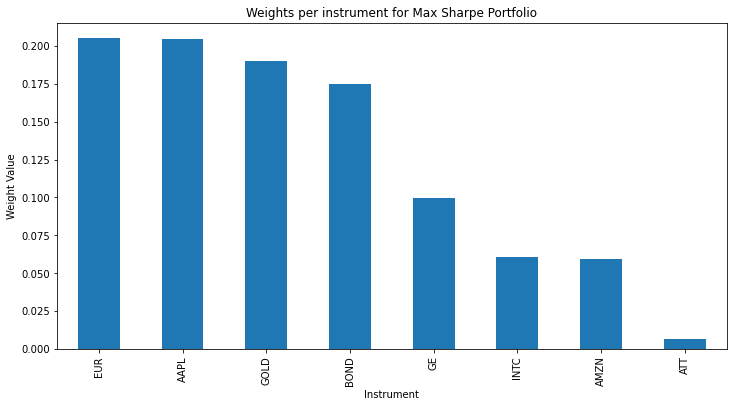

In [57]:
max_port_df.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.xlabel('Instrument')
plt.ylabel('Weight Value')
plt.title('Weights per instrument for Max Sharpe Portfolio')
plt.show();

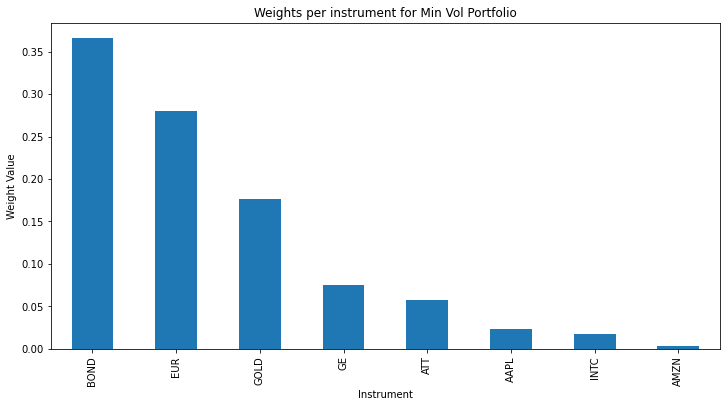

In [58]:
min_vol_df.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.xlabel('Instrument')
plt.ylabel('Weight Value')
plt.title('Weights per instrument for Min Vol Portfolio')
plt.show();

### Q5, Q6, Q7, Q8


### Plotting the Risk Return Scatter Plot

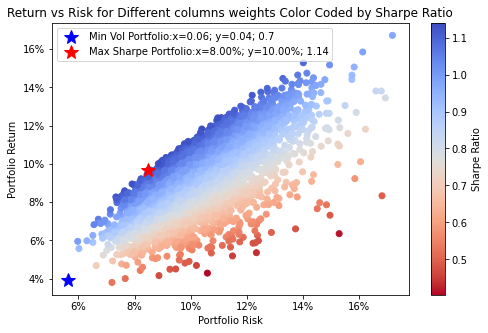

In [59]:
#Plotting the risk return scatter plot of 5000 porfolios (Monte Carlo Simulation)
plt.figure(figsize=aspect_ratio) # initializing the plot
ax = plt.subplot() # creating the subplot
plt.scatter(pvols, prets, c = prets/pvols, marker='o', cmap='coolwarm_r') # creating the scatterplot with colorscale, marker type and colormap 
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0)) # setting x axis' major formatter to tick along with percentage formatter
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0)) # setting y axis' major formatter to tick along with percentage formatter
plt.title('Return vs Risk for Different columns weights Color Coded by Sharpe Ratio') # plot title
plt.xlabel('Portfolio Risk') # setting the xlabel
plt.ylabel('Portfolio Return') # setting the ylabel
plt.colorbar(label='Sharpe Ratio') # setting the colorbar with all its attributes
plt.plot(pvols[np.argmin(pvols)], prets[np.argmin(pvols)], 'b*', markersize=15.0, label=f"Min Vol Portfolio:x={round(pvols[np.argmin(pvols)],2)}; y={round(prets[np.argmin(pvols)],2)}; {round(df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['Sharpe Ratio'].values[0],2)}")
plt.plot(pvols[np.argmax(prets/pvols)], prets[np.argmax(prets/pvols)], 'r*', markersize=15.0, label='Max Sharpe Portfolio:x={:.2%}; y={:.2%}; {:1.2f}'.format(round(pvols[np.argmax(prets/pvols)],2), round(prets[np.argmax(prets/pvols)],2), round(np.max(prets/pvols),2)))
plt.legend()
plt.show();

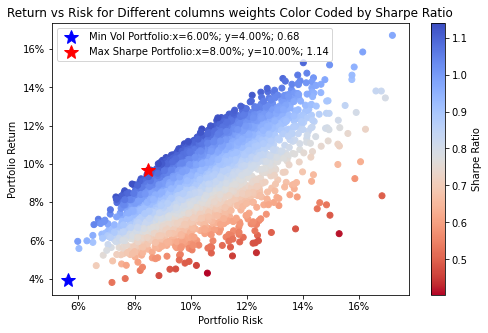

In [60]:
#Plotting the risk return scatter plot of 5000 porfolios (Monte Carlo Simulation)
plt.figure(figsize=aspect_ratio) # initializing the plot
ax = plt.subplot() # creating the subplot
plt.scatter(pvols, prets, c = prets/pvols, marker='o', cmap='coolwarm_r') # creating the scatterplot with colorscale, marker type and colormap 
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0)) # setting x axis' major formatter to tick along with percentage formatter
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0)) # setting y axis' major formatter to tick along with percentage formatter
plt.title('Return vs Risk for Different columns weights Color Coded by Sharpe Ratio') # plot title
plt.xlabel('Portfolio Risk') # setting the xlabel
plt.ylabel('Portfolio Return') # setting the ylabel
plt.colorbar(label='Sharpe Ratio') # setting the colorbar with all its attributes
plt.plot(pvols[np.argmin(pvols)], prets[np.argmin(pvols)], 'b*', markersize=15.0, label='Min Vol Portfolio:x={:.2%}; y={:.2%}; {:1.2f}'.format(round(pvols[np.argmin(pvols)],2), round(prets[np.argmin(pvols)],2), round(prets[np.argmin(prets)]/pvols[np.argmin(pvols)],2))) 
plt.plot(pvols[np.argmax(prets/pvols)], prets[np.argmax(prets/pvols)], 'r*', markersize=15.0, label='Max Sharpe Portfolio:x={:.2%}; y={:.2%}; {:1.2f}'.format(round(pvols[np.argmax(prets/pvols)],2), round(prets[np.argmax(prets/pvols)],2), round(np.max(prets/pvols),2)))
plt.legend()
plt.show();

In [61]:
round(prets[np.argmin(prets)]/pvols[np.argmin(pvols)],9)

0.675477924

In [62]:
prets[np.argmin(prets)]/pvols[np.argmin(pvols)]

0.6754779235086599

### Min Vol Anomaly

In [63]:
df_wts[df_wts['prets'] == prets[np.argmin(pvols)]] 

,weights,prets,pvols,Sharpe Ratio
2728,"[0.05760973382226917, 0.07547471445257346, 0.0...",0.039288,0.056218,0.698846


In [64]:
df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['prets'].values / df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['pvols'].values

array([0.69884641])

In [65]:
round(df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['prets'].values[0],6)

0.039288

In [66]:
round(df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['pvols'].values[0],6)

0.056218

In [67]:
df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['prets'].values[0]/df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['pvols'].values[0]

0.6988464078057459

In [68]:
round(df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['prets'].values[0],6)/round(df_wts[df_wts['prets'] == prets[np.argmin(pvols)]]['pvols'].values[0],6)

0.6988509018463837

In [69]:
round(prets[np.argmin(pvols)],6)

0.039288

In [70]:
round(pvols[np.argmin(pvols)],6)

0.056218

In [71]:
round(prets[np.argmin(prets)],6)/round(pvols[np.argmin(pvols)],6)

0.6754776050375325

In [72]:
0.039288/0.056218

0.6988509018463837

In [73]:
df_wts[(df_wts['prets'] == prets[np.argmin(pvols)]) & (df_wts['pvols']==pvols[np.argmin(pvols)]) ] 

,weights,prets,pvols,Sharpe Ratio
2728,"[0.05760973382226917, 0.07547471445257346, 0.0...",0.039288,0.056218,0.698846


In [74]:
0.1-0.013

0.08700000000000001

In [75]:
1-0.8

0.19999999999999996

In [76]:
#### Inference for Min Volatility and Max Sharpe Portfolio:



### Q9

### Comparing the equal weighted portfolio with Max Sharpe Portfolio

In [77]:
#defining equal weights for the equal weights portfolio
equal_wts = [0.125]*8


In [78]:
#creating a deep copy of the portfolio dataframe 
df_sma_copy = df_sma.copy()

In [79]:
#creating weights column to multiply with portfolio returns
df_sma_copy['Weights'] = [equal_wts] * len(df_sma_copy)

In [80]:
#multiuplying weights with daily rebalancing 
portfolio_2 = []
for i in range(len(df_sma_copy)):
    portfolio_2.append(np.dot(df_sma_copy['Weights'][i] , df_sma_copy.iloc[i,:-1]))

In [81]:
#Adding portfolio returns column
df_sma_copy['Portfolio'] = portfolio_2

In [82]:
df_sma_copy.drop('Weights',axis=1)

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND,Portfolio
Date,,,,,,,,,
2001-01-12,-0.027830,0.018971,-0.0,0.000000,-0.0,0.0,-0.000000,-0.004724,-0.001698
2001-01-16,-0.017327,-0.036270,-0.0,0.000000,-0.0,-0.0,-0.000000,0.001185,-0.006551
2001-01-17,0.004981,0.014618,-0.0,0.000000,-0.0,0.0,-0.000000,0.003317,0.002865
2001-01-18,0.004957,-0.019881,0.0,0.000000,0.0,0.0,0.000000,0.004006,-0.001365
2001-01-19,-0.017457,0.013210,0.0,0.000000,-0.0,0.0,0.000000,-0.003085,-0.000916
...,...,...,...,...,...,...,...,...,...
2018-12-24,0.034133,0.032697,-0.0,-0.024613,0.0,0.0,-0.028273,0.001688,0.001954
2018-12-26,-0.025975,-0.065712,0.0,0.000000,-0.0,-0.0,0.057936,-0.002511,-0.004533
2018-12-27,-0.002490,0.016371,-0.0,-0.000000,0.0,0.0,0.003674,0.002101,0.002457


In [83]:
calc_summary_stats(df_sma_copy.drop('Weights',axis=1))

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND,Portfolio
Average Annual Return,0.020533,0.104608,0.238173,0.200783,0.018530,0.080456,0.082284,0.008398,0.094221
Annual Risk,0.251199,0.308587,0.283479,0.332287,0.071139,0.145261,0.249602,0.037444,0.093855
Sharpe Ratio,0.081739,0.338990,0.840178,0.604247,0.260482,0.553872,0.329661,0.224273,1.003901
maxDD,-0.715106,-1.737193,-0.829613,-0.972030,-0.246239,-0.352246,-0.457487,-0.142077,-0.154481
Success Ratio,0.513043,0.519064,0.650836,0.659755,0.708361,0.677592,0.745819,0.523300,0.537570


#### From the above table we can see that maximum Sharpe of equal portfolio is 1.00 which is below the max sharpe of our constructed portfolio which is around 1.14

### Q 10

### Calculating beta

In [84]:
#constructing the max sharp porfolio with the optimal weights determined from the Monte Carlo simulation to calculate the Beta 
#weights of max portfolio
init_wts = list(df_wts[df_wts['prets'] == prets_sma[np.argmax(prets_sma/pvols_sma)]]['weights'].values)

In [85]:
init_wts

[array([0.0065161 , 0.09944205, 0.20441047, 0.05964576, 0.20504819,
        0.18976544, 0.06052765, 0.17464435])]

In [86]:
df_sma.mean()

ATT     0.000079
GE      0.000402
AAPL    0.000916
AMZN    0.000772
EUR     0.000071
GOLD    0.000309
INTC    0.000316
BOND    0.000032
dtype: float64

In [87]:
init_wts_arr = np.array(init_wts)

In [88]:
init_wts_arr[0]

array([0.0065161 , 0.09944205, 0.20441047, 0.05964576, 0.20504819,
       0.18976544, 0.06052765, 0.17464435])

In [89]:
#multiplying the max weights with daily rebalancing to create max sharpe portfolio
weightedCumReturns = init_wts_arr[0] * df_sma
weightedCumReturns

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND
Date,,,,,,,,
2001-01-12,-0.000181,0.001886,-0.0,0.000000,-0.0,0.0,-0.000000,-0.000825
2001-01-16,-0.000113,-0.003607,-0.0,0.000000,-0.0,-0.0,-0.000000,0.000207
2001-01-17,0.000032,0.001454,-0.0,0.000000,-0.0,0.0,-0.000000,0.000579
2001-01-18,0.000032,-0.001977,0.0,0.000000,0.0,0.0,0.000000,0.000700
2001-01-19,-0.000114,0.001314,0.0,0.000000,-0.0,0.0,0.000000,-0.000539
...,...,...,...,...,...,...,...,...
2018-12-24,0.000222,0.003251,-0.0,-0.001468,0.0,0.0,-0.001711,0.000295
2018-12-26,-0.000169,-0.006535,0.0,0.000000,-0.0,-0.0,0.003507,-0.000438
2018-12-27,-0.000016,0.001628,-0.0,-0.000000,0.0,0.0,0.000222,0.000367


In [90]:
weightedCumReturns['Portfolio']=weightedCumReturns.sum(axis=1)

In [91]:
#checking if the portfolio is returning same sharp as before 
calc_summary_stats(weightedCumReturns)

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND,Portfolio
Average Annual Return,0.000134,0.010402,0.048685,0.011976,0.003800,0.015268,0.004980,0.001467,0.096712
Annual Risk,0.001637,0.030687,0.057946,0.019819,0.014587,0.027565,0.015108,0.006539,0.084884
Sharpe Ratio,0.081739,0.338990,0.840178,0.604247,0.260482,0.553872,0.329661,0.224273,1.139340
maxDD,-0.004660,-0.172750,-0.169582,-0.057977,-0.050491,-0.066844,-0.027691,-0.024813,-0.190080
Success Ratio,0.513043,0.519064,0.650836,0.659755,0.708361,0.677592,0.745819,0.523300,0.542029


In [92]:
allReturnsForComparison = weightedCumReturns.copy()


In [93]:
#Calculating Beta by comapring it with SPY using Logistic regression
X = logReturnsall['SPY']
X = sm.add_constant(X)
y = allReturnsForComparison['Portfolio']

In [94]:
exog = pd.DataFrame(y,columns=['Portfolio'])

In [95]:
X

,const,SPY
Date,,
2000-01-03,1.0,-0.009835
2000-01-04,1.0,-0.039891
2000-01-05,1.0,0.001787
2000-01-06,1.0,-0.016202
2000-01-07,1.0,0.056452
...,...,...
2018-12-24,1.0,-0.026778
2018-12-26,1.0,0.049290
2018-12-27,1.0,0.007648


In [96]:
df_left_join = X.join(exog,how='inner')

In [97]:
df_left_join

,const,SPY,Portfolio
Date,,,
2001-01-12,1.0,-0.001892,0.000880
2001-01-16,1.0,0.006372,-0.003513
2001-01-17,1.0,0.004577,0.002065
2001-01-18,1.0,0.009903,-0.001245
2001-01-19,1.0,-0.005697,0.000661
...,...,...,...
2018-12-24,1.0,-0.026778,0.000589
2018-12-26,1.0,0.049290,-0.003636
2018-12-27,1.0,0.007648,0.002201


In [98]:
#runnning regression model
port_Reg = sm.OLS(df_left_join['Portfolio'], df_left_join[['const','SPY']])
port_Reg = port_Reg.fit()

In [99]:
print(port_Reg.summary())

                            OLS Regression Results                            
Dep. Variable:              Portfolio   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.21e-42
Time:                        19:35:07   Log-Likelihood:                 17262.
No. Observations:                4485   AIC:                        -3.452e+04
Df Residuals:                    4483   BIC:                        -3.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004    7.7e-05      4.667      0.0

In [100]:
# the beta term
port_Reg.params.SPY

0.08909192717509928

#### Beta of Max Sharp Portfolio is 0.089

###  Q 11

### Variations of mean variance optimization

#### 1. All benchmarks

In [101]:
#log returns of basecase instruments 
logReturns

,AAPL,AMZN,ATT,GE,INTC,GOLD,EUR,BOND
Date,,,,,,,,
2000-01-03,0.085034,0.160464,-0.036558,-0.031176,0.055385,0.003466,0.017829,-0.005384
2000-01-04,-0.088077,-0.086884,-0.060292,-0.040822,-0.047821,-0.023633,0.005161,0.003638
2000-01-05,0.014527,-0.161039,0.015417,-0.001738,0.008255,-0.008004,0.002425,-0.004583
2000-01-06,-0.090514,-0.061914,-0.026781,0.013281,-0.060064,0.003921,0.000678,0.002486
2000-01-07,0.046281,0.059222,0.008535,0.037991,0.040441,0.002310,-0.003200,0.002563
...,...,...,...,...,...,...,...,...
2018-12-24,-0.026215,-0.024613,-0.034133,-0.032697,-0.028273,0.009722,0.002985,0.001688
2018-12-26,0.068053,0.090254,0.025975,0.065712,0.057936,-0.001640,-0.004658,-0.002511
2018-12-27,-0.006511,-0.006315,0.002490,-0.016371,0.003674,0.006740,0.006759,0.002101


In [102]:
#Calculating portfolio returns for base case instruments
logReturns["Portfolio"] = logReturns.sum(axis=1)

In [103]:
#summary stats for basecase portfolio 
calc_summary_stats(logReturns)

,AAPL,AMZN,ATT,GE,INTC,GOLD,EUR,BOND,Portfolio
Average Annual Return,0.206084,0.163440,-0.029343,-0.105173,0.007195,0.081858,0.007164,0.012411,0.343636
Annual Risk,0.433101,0.536613,0.266217,0.314310,0.380026,0.178154,0.102092,0.037481,1.344284
Sharpe Ratio,0.475834,0.304578,-0.110222,-0.334616,0.018933,0.459479,0.070168,0.331122,0.255627
maxDD,-1.703828,-2.706094,-1.106851,-2.198225,-1.824269,-0.590679,-0.431375,-0.142077,-6.073153
Success Ratio,0.522344,0.512226,0.516442,0.500843,0.516863,0.524452,0.509907,0.524663,0.523398


In [104]:
#drop portfolio to run mean variance optimization 
logReturns.drop('Portfolio',axis=1,inplace=True)

In [105]:
#Mean Variance optimization 
prets = [] # initializing an empty list for returns
pvols = [] # initializing an empty list for volume
weights = []
rng = np.random.default_rng(seed=42) # creating a random number generator
required_iterations = range(5000) # creating range
for i in required_iterations: # initializing a loop for 5000 iterations
    wts = rng.random(8) # taking eight random numbers from random number generator
    wts /= np.sum(wts) # scaling the weights
    weights.append(wts)

    prets.append(annualization_factor * np.dot(wts, logReturns.mean().T)) # appending the annualized return value for the given weights across logReturns dataframe in prets list
    pvols.append(np.sqrt(annualization_factor) * np.sqrt(np.dot(np.dot(wts, logReturns.cov()), wts.T))) # appending the volume value for the given weights across logReturns dataframe in pvols list
prets = np.array(prets) # creating an array for annualized return for each iteration
pvols = np.array(pvols)

In [106]:
#creating dataframe of weights for different sharpe ratio  
df_log_ma_wts = pd.DataFrame({'weights':weights,'prets':prets,'pvols':pvols,'Sharpe Ratio':prets/pvols})

In [107]:
#max sharp portfolio 
df_log_ma_wts[df_log_ma_wts['Sharpe Ratio']==df_log_ma_wts['Sharpe Ratio'].max()]

,weights,prets,pvols,Sharpe Ratio
121,"[0.18414034643386218, 0.0689898720586678, 0.08...",0.07419,0.128683,0.576531


#### Max sharpe of the baseline portfolio is 0.576 which is less than the sharp of our constructed portfolio (1.14)

#### 2. MA strategy on all instruments

In [108]:
prices_cols_short=['ATT', 'GE']
prices_cols_flat=['AAPL', 'AMZN', 'EUR', 'GOLD','INTC', 'BOND']


In [109]:
#running MA strategy on all the instruments 
df_MA = pd.DataFrame()
for column in prices_cols_short:
    
    flatOrShort = -1
    dfPrice2 = prices.copy()
    df_MA[column] = getSMA(dfPrice2, column, 42, 260, flatOrShort) # creating the dataframe using the mving average crossover function created above 
for column in prices_cols_flat:
    dfPrice2 = prices.copy()
    df_MA[column] = getSMA(dfPrice2, column, 42,260, 0)

In [110]:
df_MA

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND
Date,,,,,,,,
2001-01-12,-0.027830,0.018971,-0.0,0.000000,-0.0,0.0,-0.0,-0.004724
2001-01-16,-0.017327,-0.036270,-0.0,0.000000,-0.0,-0.0,-0.0,0.001185
2001-01-17,0.004981,0.014618,-0.0,0.000000,-0.0,0.0,-0.0,0.003317
2001-01-18,0.004957,-0.019881,0.0,0.000000,0.0,0.0,0.0,0.004006
2001-01-19,-0.017457,0.013210,0.0,0.000000,-0.0,0.0,0.0,-0.003085
...,...,...,...,...,...,...,...,...
2018-12-24,0.034133,0.032697,-0.0,-0.024613,0.0,0.0,-0.0,0.000000
2018-12-26,-0.025975,-0.065712,0.0,0.000000,-0.0,-0.0,0.0,-0.000000
2018-12-27,-0.002490,0.016371,-0.0,-0.000000,0.0,0.0,0.0,0.000000


In [111]:
#Mean variance optimization 
prets = [] # initializing an empty list for returns
pvols = [] # initializing an empty list for volume
weights = []
rng = np.random.default_rng(seed=42) # creating a random number generator
required_iterations = range(5000) # creating range
for i in required_iterations: # initializing a loop for 5000 iterations
    wts = rng.random(8) # taking eight random numbers from random number generator
    wts /= np.sum(wts) # scaling the weights
    weights.append(wts)

    prets.append(annualization_factor * np.dot(wts, df_MA.mean().T)) # appending the annualized return value for the given weights across logReturns dataframe in prets list
    pvols.append(np.sqrt(annualization_factor) * np.sqrt(np.dot(np.dot(wts, df_MA.cov()), wts.T))) # appending the volume value for the given weights across logReturns dataframe in pvols list
prets = np.array(prets) # creating an array for annualized return for each iteration
pvols = np.array(pvols)


In [112]:
df_ma_wts = pd.DataFrame({'weights':weights,'prets':prets,'pvols':pvols,'Sharpe Ratio':prets/pvols})

In [113]:
#Weights of maximum sharp portfolio for MA strategy 
df_ma_wts[df_ma_wts['Sharpe Ratio']==df_ma_wts['Sharpe Ratio'].max()]

,weights,prets,pvols,Sharpe Ratio
1892,"[0.016164014681876487, 0.07187976718054591, 0....",0.108622,0.098543,1.102278


#### Max sharpe of the MA portfolio is 1.10 which is less than the sharp of our constructed portfolio (1.14)

#### 3. Bollinger band strategy on all instruments

In [114]:
#creating bollinger band function by accepting dataframe, lookback window and std band as inputs and returns orginal and BB returns
def Bollinger_Bands(df,col,window,stDevBand):
    dfPrices = df.copy()
    dfPrices = dfPrices[[col]]
    dfPrices.loc[:,'Mean'] = dfPrices[col].rolling(window).mean()
    dfPrices.loc[:,'Stdev'] = dfPrices[col].rolling(window).std()
    dfPrices.loc[:,'Upper'] = dfPrices['Mean'] + stDevBand * dfPrices['Stdev']
    dfPrices.loc[:,'Lower'] = dfPrices['Mean'] - stDevBand * dfPrices['Stdev']
    dfPrices.dropna(inplace=True)
    date0 = dfPrices.index[0]
    if dfPrices.loc[date0,col] >= dfPrices.loc[date0, 'Upper']:
        dfPrices.loc[date0, 'Position'] = -1
    elif dfPrices.loc[date0,col] <= dfPrices.loc[date0,'Lower']:
        dfPrices.loc[date0, 'Position'] = 1
    else:
        dfPrices.loc[date0, 'Position'] = 0

# then loop over the entire data set
    for i in range(1, dfPrices.shape[0]):
        today=dfPrices.index[i]
        yesterday=dfPrices.index[i-1]
        if dfPrices.loc[today,col] >= dfPrices.loc[today,'Upper']: # if close is above upper
            dfPrices.loc[today,'Position'] = -1 # then go short
        elif dfPrices.loc[today,col] <= dfPrices.loc[today,'Lower']: # if close is below lower
            dfPrices.loc[today,'Position'] = 1 # then go long
        elif dfPrices.loc[yesterday,'Position'] == -1 and dfPrices.loc[today,col] <= dfPrices.loc[today,'Mean']: # if prev day is short and we're now below the mean
            dfPrices.loc[today,'Position']=0 # then flatten
        elif dfPrices.loc[yesterday,'Position'] == 1 and dfPrices.loc[today, col] >= dfPrices.loc[today, 'Mean']: # conversely...
            dfPrices.loc[today,'Position']=0 # then also flatten
        else: # otherwise just hold yesterday's position
            dfPrices.loc[today,'Position']=dfPrices.loc[yesterday,'Position']
    dfPrices.loc[:,'OriginalReturns'] = np.log(dfPrices[col] / dfPrices[col].shift(1))
    dfPrices.loc[:,'BBReturns'] = dfPrices['Position'].shift(1) * dfPrices['OriginalReturns']
    dfPrices.dropna(inplace=True)
    dfPrices[['OriginalReturns', 'BBReturns']].sum()
    np.exp(dfPrices[['OriginalReturns', 'BBReturns']].sum())
    dfPrices[['OriginalReturns', 'BBReturns']].mean() * 260
    dfPrices[['OriginalReturns', 'BBReturns']].std() * np.sqrt(260)
    return dfPrices['BBReturns'].values

In [115]:
#Bollinger_Bands(df_prices,'AAPL',window=20, stDevBand=2)

In [116]:
df_bb = pd.DataFrame()
for col in df_prices.columns:
    df_bb[col] = Bollinger_Bands(df_prices,col,window=20,stDevBand=2)

In [117]:
df_bb

,AAPL,AMZN,ATT,GE,INTC,GOLD,EUR,BOND
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004112,-0.000000
1,-0.000000,0.000000,-0.000000,0.014815,0.000000,-0.000000,0.000412,0.000000
2,-0.000000,0.000000,0.000000,-0.014349,-0.000000,0.000000,0.005545,0.000000
3,0.000000,0.000000,-0.000000,0.037965,0.000000,0.000000,0.013124,0.000000
4,0.000000,0.069152,0.000000,0.016470,0.000000,0.000000,-0.006286,0.002785
...,...,...,...,...,...,...,...,...
4720,-0.026215,-0.024613,-0.034133,-0.000000,-0.028273,-0.009722,-0.002985,-0.001688
4721,0.068053,0.090254,0.025975,0.000000,0.057936,0.001640,0.004658,0.002511
4722,-0.006511,-0.006315,0.002490,-0.000000,0.003674,-0.006740,0.000000,-0.002101
4723,0.000512,0.011144,0.010952,0.000000,0.008377,-0.003912,0.000000,-0.000285


In [118]:
#Calc summary stats for BB statergy 
calc_summary_stats(df_bb)

,AAPL,AMZN,ATT,GE,INTC,GOLD,EUR,BOND
Average Annual Return,-0.147158,0.099495,0.041937,-0.061784,0.085996,0.010809,-0.019040,-0.004929
Annual Risk,0.338743,0.385179,0.195966,0.247990,0.274590,0.132970,0.076547,0.026715
Sharpe Ratio,-0.434424,0.258309,0.213999,-0.249139,0.313179,0.081292,-0.248731,-0.184488
maxDD,-3.189257,-0.924047,-0.465143,-1.617925,-0.578121,-0.357139,-0.521978,-0.136674
Success Ratio,0.709841,0.732910,0.746243,0.733545,0.745820,0.748783,0.725503,0.742011


In [119]:
#mean variance optimisation for BB stratergy 
prets = [] # initializing an empty list for returns
pvols = [] # initializing an empty list for volume
weights = []
rng = np.random.default_rng(seed=42) # creating a random number generator
required_iterations = range(5000) # creating range
for i in required_iterations: # initializing a loop for 5000 iterations
    wts = rng.random(8) # taking eight random numbers from random number generator
    wts /= np.sum(wts) # scaling the weights
    weights.append(wts)

    prets.append(annualization_factor * np.dot(wts, df_bb.mean().T)) # appending the annualized return value for the given weights across logReturns dataframe in prets list
    pvols.append(np.sqrt(annualization_factor) * np.sqrt(np.dot(np.dot(wts, df_bb.cov()), wts.T))) # appending the volume value for the given weights across logReturns dataframe in pvols list
prets = np.array(prets) # creating an array for annualized return for each iteration
pvols = np.array(pvols)


In [120]:
#data frame for 5000 simulations 
df_bb_wts = pd.DataFrame({'weights':weights,'prets':prets,'pvols':pvols,'Sharpe Ratio':prets/pvols})

In [121]:
#max sharp portfolio for BB strategy 
df_bb_wts[df_bb_wts['Sharpe Ratio']==df_bb_wts['Sharpe Ratio'].max()]

,weights,prets,pvols,Sharpe Ratio
2103,"[0.0015253045267880792, 0.15083360708353577, 0...",0.040186,0.107075,0.375307


#### Max sharpe of the MA portfolio is 0.375 which is less than the sharp of our constructed portfolio (1.14)

### Q.12

#### Summary of the final portfolio

In [122]:
#Function to pretty print the dataframe 
# data frame "pretty print" function to print percentages. There are some optional parameters
def pretty_print (dF, pct_format=pct_format_4d, nan='NaN', indexSlice=pd.IndexSlice[:,:]):
    display(dF.style.format(pct_format, na_rep=nan, subset=indexSlice))

In [123]:
annualization_factor=260
pct_format_2d = '{:.2%}'
def calculate_summary_final(dF, af=annualization_factor, pct_format=pct_format_2d):
    cumRtns = dF.cumsum()
    summary_stats = pd.DataFrame([af*dF.mean(),
                                  np.sqrt(af)*dF.std(),
                                  np.sqrt(af) * dF.mean() / dF.std(),
                                  (cumRtns - np.maximum.accumulate(cumRtns)).min(axis=0),
                                  (dF >= 0).sum() / dF.shape[0]
                                 ],
                                 index=['Average Annual Return', 'Annual Risk', 'Sharpe Ratio', 'maxDD', 'Success Ratio']
                                )
    pretty_print(summary_stats, pct_format=pct_format, indexSlice=pd.IndexSlice[['Average Annual Return', 'Annual Risk', 'maxDD', 'Success Ratio'], :])
    #percent_df_display(summary_stats, pct_format)
    

In [124]:
#weights of max portfolio
init_wts = list(df_wts[df_wts['prets'] == prets_sma[np.argmax(prets_sma/pvols_sma)]]['weights'].values)

In [125]:
init_wts[0]

array([0.0065161 , 0.09944205, 0.20441047, 0.05964576, 0.20504819,
       0.18976544, 0.06052765, 0.17464435])

In [126]:
df_final = df_sma.copy()

In [127]:
#daily rebalancing of the max portfolio
portfolio_final = []
for i in range(len(df_sma)):
    portfolio_final.append(np.dot(df_final.iloc[i,:] , init_wts[0]))

In [128]:
df_final['Portfolio'] = portfolio_final

In [129]:
df_final

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND,Portfolio
Date,,,,,,,,,
2001-01-12,-0.027830,0.018971,-0.0,0.000000,-0.0,0.0,-0.000000,-0.004724,0.000880
2001-01-16,-0.017327,-0.036270,-0.0,0.000000,-0.0,-0.0,-0.000000,0.001185,-0.003513
2001-01-17,0.004981,0.014618,-0.0,0.000000,-0.0,0.0,-0.000000,0.003317,0.002065
2001-01-18,0.004957,-0.019881,0.0,0.000000,0.0,0.0,0.000000,0.004006,-0.001245
2001-01-19,-0.017457,0.013210,0.0,0.000000,-0.0,0.0,0.000000,-0.003085,0.000661
...,...,...,...,...,...,...,...,...,...
2018-12-24,0.034133,0.032697,-0.0,-0.024613,0.0,0.0,-0.028273,0.001688,0.000589
2018-12-26,-0.025975,-0.065712,0.0,0.000000,-0.0,-0.0,0.057936,-0.002511,-0.003636
2018-12-27,-0.002490,0.016371,-0.0,-0.000000,0.0,0.0,0.003674,0.002101,0.002201


In [130]:
#summary stats for final max sharp portfolio 
calculate_summary_final(df_final)

,ATT,GE,AAPL,AMZN,EUR,GOLD,INTC,BOND,Portfolio
Average Annual Return,2.05%,10.46%,23.82%,20.08%,1.85%,8.05%,8.23%,0.84%,9.67%
Annual Risk,25.12%,30.86%,28.35%,33.23%,7.11%,14.53%,24.96%,3.74%,8.49%
Sharpe Ratio,0.081739,0.338990,0.840178,0.604247,0.260482,0.553872,0.329661,0.224273,1.139340
maxDD,-71.51%,-173.72%,-82.96%,-97.20%,-24.62%,-35.22%,-45.75%,-14.21%,-19.01%
Success Ratio,51.30%,51.91%,65.08%,65.98%,70.84%,67.76%,74.58%,52.33%,54.20%


##### From the above table we can see that the overall portfolio sharp is higher than than any individual instrument sharp. This underpins the advantages of diversification of instruments in a portfolio to reduce the unsystematic risk.
#####  In addition we see that the max drawdown and annual risk of portfolio is also less compared to most of the individual instruments in the portfolio making it a good opportunity for a risk averse investor. 